In [220]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix
import warnings
from sklearn.exceptions import DataConversionWarning
import joblib
#filter warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Loading the test dataset
test_data = pd.read_csv('/Users/zainab/student_data.csv')


In [221]:
test_data.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


In [222]:
test_data.describe()

,Student ID,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,20.944000,2.905780,3.04600,2.052000,0.474000
std,144.481833,1.455025,0.839559,1.36073,1.407572,0.499824
min,0.000000,18.000000,0.000000,1.00000,0.000000,0.000000
25%,124.750000,20.000000,2.345000,2.00000,1.000000,0.000000
50%,249.500000,21.000000,2.990000,3.00000,2.000000,0.000000
75%,374.250000,22.000000,3.560000,4.00000,3.000000,1.000000
max,499.000000,25.000000,4.000000,5.00000,4.000000,1.000000


In [223]:
#Loading the pickle model
model =joblib.load('model.pkl')


In [224]:
#Eliminating the student id and gender
test_data =test_data.drop(columns=['Student ID', 'Gender'])

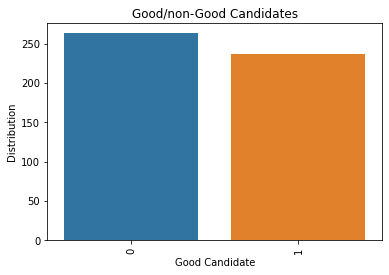

In [225]:
#Plotting the distribution of the test dataset (Good Candidate)
plt.title('Good/non-Good Candidates')
sns.countplot(x='Good Candidate', data=test_data)
plt.ylabel('Distribution')
plt.xticks(rotation=90) 
plt.show()

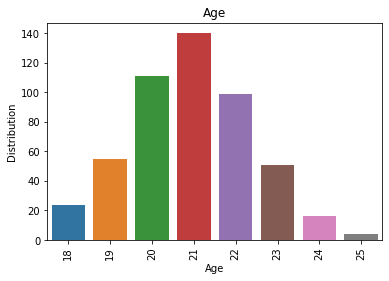

In [226]:
#Plotting the distribution of the test dataset (Age)
plt.title('Age')
sns.countplot(x='Age', data=test_data)
plt.ylabel('Distribution')
plt.xticks(rotation=90) 
plt.show()

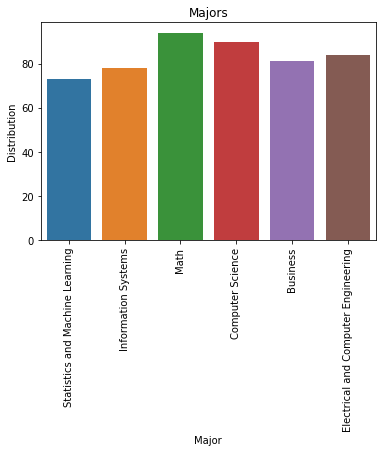

In [227]:
#Plotting the distribution of the test dataset (Majors)
plt.title('Majors')
sns.countplot(x='Major', data=test_data)
plt.ylabel('Distribution')
plt.xticks(rotation=90) 
plt.show()

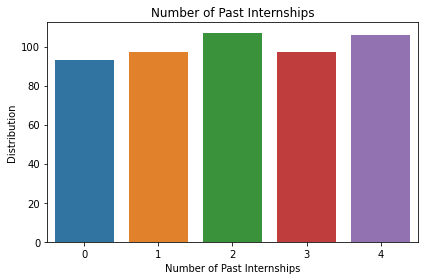

In [228]:
#Plotting the distribution of the test dataset (Number of Past Internships)
plt.title('Number of Past Internships')
sns.countplot(x='Num Past Internships', data=test_data )
plt.ylabel('Distribution')
plt.xlabel('Number of Past Internships')
plt.tight_layout()
plt.show()



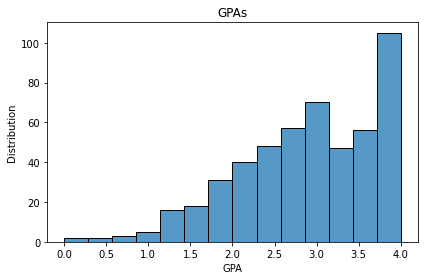

In [229]:
#Plotting the distribution of the test dataset (GPAs)
plt.title('GPAs')
sns.histplot(test_data['GPA'])
plt.xlabel('GPA')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

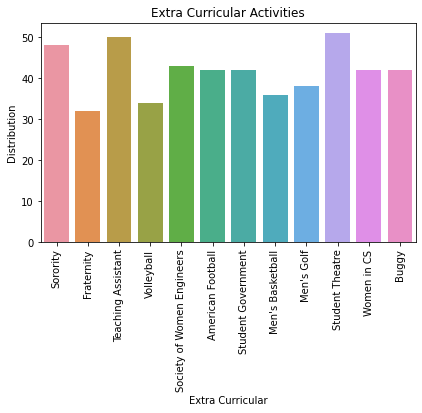

In [230]:
#Plotting the distribution of the test dataset (Extra Curricular Activities)
plt.title('Extra Curricular Activities')
sns.countplot(x='Extra Curricular', data=test_data )
plt.ylabel('Distribution')
plt.tight_layout()
plt.xticks(rotation=90) 
plt.show()

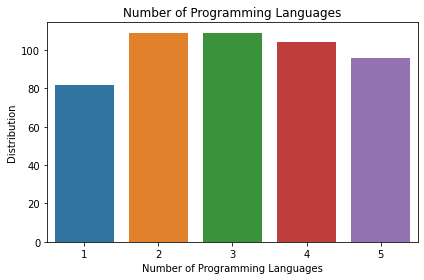

In [231]:
#Plotting the distribution of the test dataset (Number of Programming Languages)
plt.title('Number of Programming Languages')
sns.countplot(x='Num Programming Languages', data=test_data )
plt.ylabel('Distribution')
plt.xlabel('Number of Programming Languages')
plt.tight_layout()
plt.show()

In [232]:
#Predicting
x_test = test_data.drop(columns=['Good Candidate'], axis=1)

prediction =model.predict(x_test)

Acuuracy Score for the model is 0.832
[[221  42]
 [ 42 195]]


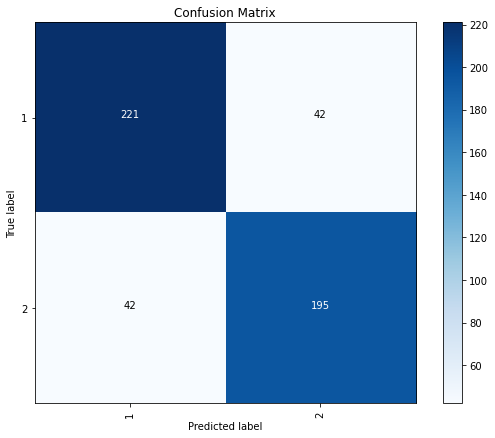

In [253]:
#computing the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
y_test= test_data['Good Candidate']
accuracy = accuracy_score(y_test, prediction)
print("Acuuracy Score for the model is", accuracy)

confusion_matrix= confusion_matrix(y_test, prediction)

print(confusion_matrix)

import itertools
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

# To plot the matrix
classes = ["1", "2"] 
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)


thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'), horizontalalignment="center", color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [234]:
print("done") 

done
